# K Nearest Neighbors Classification on MNIST Dataset
<ol>
<li> Instance Based Algorithm (Lazy Learner).</li>
<li> Supervised Learning Algorithms which works for both Classification and Regression. </li>
<li> It works based on Mode of KNN for Classification and Mean for Regression.</li>
<li> It works for both Categorical and Numerical Independet Features. </li>
</ol>

<b> Algorithm: </b>
<ol>
<li> Find Distance of each xtest point to xtrain points. </li>
<li> Choose K nearest neigbours of xtest </li>
<li> Classification -> mode(y1,y2....yk) --> yhat, 
<br> Regression -> mean(y1,y2,..yk) ---> yhat </li>
<li> Check Performance metrics </li>
</ol>

<b>Note: </b>
<ul>
<li> k is the hyperparameter can be choosen using cross validation. </li>
<li> Higher the k more the chance for underfitting </li>
<li> Lower the k value more is the chance for overfitting. </li>
<li> There is impact of outliers depending upon k value </li>
<li> Greaty affected by class imbalance. </li>

</ul>

<b> Basic Preprocessing Steps: </b>
<ul>
<li> As KNN works based on Distace so it is better to standardize or normalize before model building. </li>
<li> Handling Outliers. </li>
<li> Handling Imbalanced Datasets by upsampling and downsampling. </li>
</ul>


In [1]:
#Importing necessary Libraries
import pandas as pd
import numpy as np
import math as m
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [23]:
class KNN:
  def __init__(self,k,x,y):
    '''
     Constructor Function to initiaze class memebers.
     args:
     k: Hyperparameter
     x: x
     y: Y Column

     return: None
    '''

    self.K = k
    self.x = x
    self.y = y
  
  def euclidean(self,x1,x2):
    '''
    Function to calculate eucliedean distance between given 2 points x1 x2
    args:
    x1: list of coordinates of point 1
    x2: list of coordincates of point 2
    return: distance between point1 and point2 float
    '''
    dist = 0 
    for i in range(len(x1)):
      dist += (x1[i]-x2[i])**2
    return dist**0.5

  def mode(self,arr):
    '''
    Function to calculate mode of given array
    args:
    arr: list
    return: mode
    '''
    hash = {}
    for i in arr:
      if i in hash:
        hash[i]+=1
      else:
        hash[i]=1
    
    mx = max(hash.values())
    for i in hash:
      if hash[i]==mx:
        return i
    
    return -1

  def Predict(self,x_test):
    '''
    Function to predict for given x test
    args:
    xtest: dataframe containing indpendent features
    return: List of all the yhats of given xtest
    '''
    xtrain = np.array(self.x)
    ytrain = np.array(self.y)
    xtest = np.array(x_test)
    yhat_test = []
    

    for i in range(len(xtest)):
      dic = {}
      for j in range(len(xtrain)):
        dic[str(i)+"_"+str(j)+"_"+str(ytrain[j])] = self.euclidean(xtest[i],xtrain[j])
  
      dic = dict(sorted(dic.items(), key=lambda item: item[1]))
      yknn = list(dic.keys())[:self.K]
      yhat = []
      for i in yknn:
        yhat.append(i.split("_")[-1])
      yhat_test.append(self.mode(yhat))
    
    return yhat_test

## EDA

In [24]:
df = pd.read_csv("https://raw.githubusercontent.com/cerndb/dist-keras/master/examples/data/mnist.csv")

In [25]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
from google.colab.patches import cv2_imshow

In [27]:
df.shape

(42000, 785)

In [28]:
cv2_imshow(np.array(df.iloc[0,1:]).reshape(28,28))

In [29]:
df.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


### Inference:
<ol>
<li>
Columns pixel0 to pixel783 are independent features.</li>
<li> Label column is dependent feature. </li>
</ol>


In [30]:
class_counts = dict(df["label"].value_counts())

In [31]:
class_counts

{1: 4684,
 7: 4401,
 3: 4351,
 9: 4188,
 2: 4177,
 6: 4137,
 0: 4132,
 4: 4072,
 8: 4063,
 5: 3795}

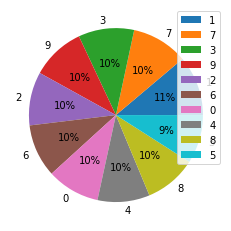

In [32]:
plt.pie(class_counts.values(),labels=class_counts.keys(),autopct='%.0f%%')
plt.legend()

### Inference:
<ol>
<li> Class Balanced therefore no need to do upsampling or downsampling. </li>
</ol>

### Peforming Dimensionality Reduction for better understanding the visualization using PCA. (Principal Component Analysis). 

In [11]:
from sklearn.decomposition import PCA

In [105]:
X = df.drop(columns=["label"])
Y = df.label
pca = PCA(n_components=100)
X = pca.fit_transform(X)

### Train Test Split

In [109]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.0030)

In [110]:
x_train.shape

(41874, 100)

In [111]:
x_test.shape

(126, 100)

### Visualising the data

In [112]:
ex = x_train[0].reshape(10,10)

In [113]:
cv2_imshow(ex)

## Model Building

In [114]:
model = KNN(5,x_train,y_train)

In [115]:
ypred = model.Predict(x_test)

In [116]:
ypred = [int(i) for i in ypred]

### Accuracy(Since there is no Class imbalance)



In [117]:
Accuracy = 0
y_test = list(y_test)
for i in range(len(ypred)):
  if ypred[i]==y_test[i]:
    Accuracy+=1

print("Accuracy of the Model:",Accuracy/len(ypred)*100,"%")

Accuracy of the Model: 99.20634920634922 %


## Sklearn Implementation of K Nearest Neighbors

In [118]:
from sklearn.neighbors import KNeighborsClassifier

In [119]:
neigh = KNeighborsClassifier(n_neighbors=5)

In [120]:
neigh.fit(x_train, y_train)

KNeighborsClassifier()

In [121]:
y_pred_sklearn = neigh.predict(x_test)

In [122]:
Accuracy = 0
y_test = list(y_test)
for i in range(len(y_pred_sklearn)):
  if y_pred_sklearn[i]==y_test[i]:
    Accuracy+=1

print("Accuracy of the Model:",Accuracy/len(ypred)*100,"%")

Accuracy of the Model: 99.20634920634922 %
